# Analyze Data
## Load in Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV

## Load in Data and Remove Unnecessary Columns

In [3]:
master_mood = pd.read_csv('master_mood.csv')
master_mood

,Unnamed: 0,Name,Track_ID,Album,Artist,Artist_ID,Artist_Genre,Duration_ms,Popularity,Explicit,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Playlist,Mood,MoodR,ExplicitR
0,0,I Ain't Worried,4h9wh7iOZ0GGn8QVp4RAOB,I Ain’t Worried (Music From The Motion Picture...,OneRepublic,5Pwc4xIPtQLFEnJriah9YJ,"['piano rock', 'pop', 'pop rock']",148485,97,False,...,0.0475,0.082600,0.000745,0.0546,0.825,139.994,Mood_Booster,Happy,1,0
1,1,As It Was,4LRPiXqCikLlN15c3yImP7,As It Was,Harry Styles,6KImCVD70vtIoJWnq6nGn3,['pop'],167303,96,False,...,0.0557,0.342000,0.001010,0.3110,0.662,173.930,Mood_Booster,Happy,1,0
2,2,Left and Right (Feat. Jung Kook of BTS),0mBP9X2gPCuapvpZ7TGDk3,Left and Right (Feat. Jung Kook of BTS),Charlie Puth,6VuMaDnrHyPL1p4EHjYLi7,"['dance pop', 'pop', 'viral pop']",154486,93,False,...,0.0324,0.619000,0.000013,0.0901,0.719,101.058,Mood_Booster,Happy,1,0
3,3,SNAP,76OGwb5RA9h4FxQPT33ekc,SNAP,Rosa Linn,46xBNx0j6cwY6sD9LgMTm1,[],179551,93,False,...,0.0638,0.107000,0.000010,0.4470,0.525,170.010,Mood_Booster,Happy,1,0
4,4,Sunroof,4h4QlmocP3IuwYEj2j14p8,Sunroof,Nicky Youre,7qmpXeNz2ojlMl2EEfkeLs,[],163025,93,False,...,0.0401,0.352000,0.000000,0.1500,0.842,131.443,Mood_Booster,Happy,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,955,Oh!,4e72LGraX8sW5iztJvS5fo,Oh!,The Linda Lindas,13dTrWNNrnZ3AkgNyQNKP5,['riot grrrl'],155821,48,False,...,0.0609,0.000039,0.494000,0.0605,0.898,150.050,Walk_Like_A_Badass,Confidence,5,0
947,956,God Complex (Mojo),1B3ouXA9iRkqY1ywvZbzZ5,God Complex (Mojo),poutyface,0H44O4IYqpTOGx4c5nV37f,"['alt z', 'modern indie pop', 'viral rap']",106740,48,True,...,0.0571,0.004390,0.335000,0.4080,0.931,154.958,Walk_Like_A_Badass,Confidence,5,1
948,957,I EXIST,3eI62ZWWxkl4LUaBqXvA6Y,I EXIST,VUKOVI,1844Ua6R4gOuH6GLdlR4dt,"['modern alternative rock', 'modern rock', 'pi...",269666,49,True,...,0.0680,0.000063,0.004830,0.3180,0.298,135.055,Walk_Like_A_Badass,Confidence,5,1
949,958,Apartment Complex on the Eastside,1cRk9clJhi67mcfTxNfnjU,It Took A Lot To Get To This,Dylan Fraser,6Awp6fgyzqQ2XuEvOMjq8D,[],247545,41,True,...,0.0577,0.075800,0.035200,0.3460,0.330,149.916,Walk_Like_A_Badass,Confidence,5,1


In [4]:
mood_cleaned = master_mood.drop(['Unnamed: 0', 'Name', 'Track_ID', 'Album', 'Artist','Artist_ID','Artist_Genre', 'Explicit', 'Playlist', 'MoodR'], axis = 1)
mood_cleaned

,Duration_ms,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Mood,ExplicitR
0,148485,97,0.704,0.797,0,-5.927,1,0.0475,0.082600,0.000745,0.0546,0.825,139.994,Happy,0
1,167303,96,0.520,0.731,6,-5.338,0,0.0557,0.342000,0.001010,0.3110,0.662,173.930,Happy,0
2,154486,93,0.881,0.592,2,-4.898,1,0.0324,0.619000,0.000013,0.0901,0.719,101.058,Happy,0
3,179551,93,0.565,0.636,0,-8.198,1,0.0638,0.107000,0.000010,0.4470,0.525,170.010,Happy,0
4,163025,93,0.768,0.714,10,-5.110,1,0.0401,0.352000,0.000000,0.1500,0.842,131.443,Happy,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,155821,48,0.639,0.950,2,-3.313,1,0.0609,0.000039,0.494000,0.0605,0.898,150.050,Confidence,0
947,106740,48,0.573,0.723,6,-3.333,0,0.0571,0.004390,0.335000,0.4080,0.931,154.958,Confidence,1
948,269666,49,0.469,0.882,5,-4.702,1,0.0680,0.000063,0.004830,0.3180,0.298,135.055,Confidence,1
949,247545,41,0.469,0.885,1,-5.433,1,0.0577,0.075800,0.035200,0.3460,0.330,149.916,Confidence,1


In [5]:
mood_no_out = pd.read_csv('mood_no_out.csv')
mood_no_out

,Unnamed: 0,Name,Track_ID,Album,Artist,Artist_ID,Artist_Genre,Duration_ms,Popularity,Explicit,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Playlist,Mood,MoodR,ExplicitR
0,0,I Ain't Worried,4h9wh7iOZ0GGn8QVp4RAOB,I Ain’t Worried (Music From The Motion Picture...,OneRepublic,5Pwc4xIPtQLFEnJriah9YJ,"['piano rock', 'pop', 'pop rock']",148485,97,False,...,0.0475,0.08260,0.000745,0.0546,0.825,139.994,Mood_Booster,Happy,1,0
1,2,Left and Right (Feat. Jung Kook of BTS),0mBP9X2gPCuapvpZ7TGDk3,Left and Right (Feat. Jung Kook of BTS),Charlie Puth,6VuMaDnrHyPL1p4EHjYLi7,"['dance pop', 'pop', 'viral pop']",154486,93,False,...,0.0324,0.61900,0.000013,0.0901,0.719,101.058,Mood_Booster,Happy,1,0
2,4,Sunroof,4h4QlmocP3IuwYEj2j14p8,Sunroof,Nicky Youre,7qmpXeNz2ojlMl2EEfkeLs,[],163025,93,False,...,0.0401,0.35200,0.000000,0.1500,0.842,131.443,Mood_Booster,Happy,1,0
3,5,I Like You (A Happier Song) (with Doja Cat),0O6u0VJ46W86TxN9wgyqDj,Twelve Carat Toothache,Post Malone,246dkjvS1zLTtiykXe5h60,"['dfw rap', 'melodic rap', 'rap']",192840,92,True,...,0.0751,0.12100,0.000000,0.1210,0.472,100.964,Mood_Booster,Happy,1,1
4,6,Dandelions,2eAvDnpXP5W0cVtiI0PUxV,Safe Haven,Ruth B.,2WzaAvm2bBCf4pEhyuDgCY,"['alt z', 'canadian contemporary r&b', 'canadi...",233720,91,False,...,0.0259,0.01570,0.000000,0.0864,0.454,116.959,Mood_Booster,Happy,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,936,I.N.V.U.,6qTagiSQjEcfpVm1NHJJEU,I.N.V.U.,Kid Kapichi,2iwVdN0Geaw5Sn2Abeh9fB,"['british alternative rock', 'english indie ro...",163560,48,False,...,0.0843,0.00611,0.000027,0.0314,0.965,125.126,Walk_Like_A_Badass,Confidence,5,0
509,941,Fuck Me (I Didn’t Know How To Say),07M8tCNuO9RZenyINtp2QB,Fuck Me (I Didn’t Know How To Say),Crawlers,2xtmoxSauQs0TQFUoHmbfy,"['indie pop', 'warrington indie']",186786,56,True,...,0.0892,0.02630,0.001220,0.0911,0.555,179.346,Walk_Like_A_Badass,Confidence,5,1
510,942,THREE HEADS*,4apXjryIqMFUdOjWMM6zZp,THREE HEADS*,Jean Dawson,7vNNmjV14SKQzlQAEg0BXP,['modern indie pop'],171842,60,False,...,0.0520,0.44300,0.000158,0.0787,0.610,139.991,Walk_Like_A_Badass,Confidence,5,0
511,943,What Went Down,78tgXRq9Q6tPNP9hKCpgwB,What Went Down,Foals,6FQqZYVfTNQ1pCqfkwVFEa,"['indie rock', 'modern rock', 'oxford indie', ...",300720,56,False,...,0.0722,0.00313,0.004420,0.0643,0.128,146.940,Walk_Like_A_Badass,Confidence,5,0


In [6]:
mood_no_out = mood_no_out.drop(['Unnamed: 0','Name', 'Track_ID', 'Album', 'Artist','Artist_ID','Artist_Genre', 'Explicit', 'Playlist', 'MoodR'], axis = 1)
mood_no_out

,Duration_ms,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Mood,ExplicitR
0,148485,97,0.704,0.797,0,-5.927,1,0.0475,0.08260,0.000745,0.0546,0.825,139.994,Happy,0
1,154486,93,0.881,0.592,2,-4.898,1,0.0324,0.61900,0.000013,0.0901,0.719,101.058,Happy,0
2,163025,93,0.768,0.714,10,-5.110,1,0.0401,0.35200,0.000000,0.1500,0.842,131.443,Happy,0
3,192840,92,0.733,0.670,5,-6.009,1,0.0751,0.12100,0.000000,0.1210,0.472,100.964,Happy,1
4,233720,91,0.609,0.692,1,-2.958,1,0.0259,0.01570,0.000000,0.0864,0.454,116.959,Happy,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,163560,48,0.778,0.780,0,-5.300,1,0.0843,0.00611,0.000027,0.0314,0.965,125.126,Confidence,0
509,186786,56,0.521,0.679,8,-6.093,1,0.0892,0.02630,0.001220,0.0911,0.555,179.346,Confidence,1
510,171842,60,0.564,0.875,6,-4.013,1,0.0520,0.44300,0.000158,0.0787,0.610,139.991,Confidence,0
511,300720,56,0.231,0.919,2,-6.182,0,0.0722,0.00313,0.004420,0.0643,0.128,146.940,Confidence,0


In [7]:
mood_no_ex = pd.read_csv("mood_no_ex.csv")
mood_no_ex

,Unnamed: 0,Name,Track_ID,Album,Artist,Artist_ID,Artist_Genre,Duration_ms,Popularity,Explicit,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Playlist,Mood,MoodR,ExplicitR
0,0,I Ain't Worried,4h9wh7iOZ0GGn8QVp4RAOB,I Ain’t Worried (Music From The Motion Picture...,OneRepublic,5Pwc4xIPtQLFEnJriah9YJ,"['piano rock', 'pop', 'pop rock']",148485,97,False,...,0.0475,0.082600,0.000745,0.0546,0.825,139.994,Mood_Booster,Happy,1,0
1,1,As It Was,4LRPiXqCikLlN15c3yImP7,As It Was,Harry Styles,6KImCVD70vtIoJWnq6nGn3,['pop'],167303,96,False,...,0.0557,0.342000,0.001010,0.3110,0.662,173.930,Mood_Booster,Happy,1,0
2,2,Left and Right (Feat. Jung Kook of BTS),0mBP9X2gPCuapvpZ7TGDk3,Left and Right (Feat. Jung Kook of BTS),Charlie Puth,6VuMaDnrHyPL1p4EHjYLi7,"['dance pop', 'pop', 'viral pop']",154486,93,False,...,0.0324,0.619000,0.000013,0.0901,0.719,101.058,Mood_Booster,Happy,1,0
3,3,SNAP,76OGwb5RA9h4FxQPT33ekc,SNAP,Rosa Linn,46xBNx0j6cwY6sD9LgMTm1,[],179551,93,False,...,0.0638,0.107000,0.000010,0.4470,0.525,170.010,Mood_Booster,Happy,1,0
4,4,Sunroof,4h4QlmocP3IuwYEj2j14p8,Sunroof,Nicky Youre,7qmpXeNz2ojlMl2EEfkeLs,[],163025,93,False,...,0.0401,0.352000,0.000000,0.1500,0.842,131.443,Mood_Booster,Happy,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,946,Oh!,4e72LGraX8sW5iztJvS5fo,Oh!,The Linda Lindas,13dTrWNNrnZ3AkgNyQNKP5,['riot grrrl'],155821,48,False,...,0.0609,0.000039,0.494000,0.0605,0.898,150.050,Walk_Like_A_Badass,Confidence,5,0
935,947,God Complex (Mojo),1B3ouXA9iRkqY1ywvZbzZ5,God Complex (Mojo),poutyface,0H44O4IYqpTOGx4c5nV37f,"['alt z', 'modern indie pop', 'viral rap']",106740,48,True,...,0.0571,0.004390,0.335000,0.4080,0.931,154.958,Walk_Like_A_Badass,Confidence,5,1
936,948,I EXIST,3eI62ZWWxkl4LUaBqXvA6Y,I EXIST,VUKOVI,1844Ua6R4gOuH6GLdlR4dt,"['modern alternative rock', 'modern rock', 'pi...",269666,49,True,...,0.0680,0.000063,0.004830,0.3180,0.298,135.055,Walk_Like_A_Badass,Confidence,5,1
937,949,Apartment Complex on the Eastside,1cRk9clJhi67mcfTxNfnjU,It Took A Lot To Get To This,Dylan Fraser,6Awp6fgyzqQ2XuEvOMjq8D,[],247545,41,True,...,0.0577,0.075800,0.035200,0.3460,0.330,149.916,Walk_Like_A_Badass,Confidence,5,1


In [8]:
mood_no_ex = mood_no_ex.drop(['Unnamed: 0', 'Name', 'Track_ID', 'Album', 'Artist','Artist_ID','Artist_Genre', 'Explicit', 'Playlist', 'MoodR'], axis = 1)
mood_no_ex

,Duration_ms,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Mood,ExplicitR
0,148485,97,0.704,0.797,0,-5.927,1,0.0475,0.082600,0.000745,0.0546,0.825,139.994,Happy,0
1,167303,96,0.520,0.731,6,-5.338,0,0.0557,0.342000,0.001010,0.3110,0.662,173.930,Happy,0
2,154486,93,0.881,0.592,2,-4.898,1,0.0324,0.619000,0.000013,0.0901,0.719,101.058,Happy,0
3,179551,93,0.565,0.636,0,-8.198,1,0.0638,0.107000,0.000010,0.4470,0.525,170.010,Happy,0
4,163025,93,0.768,0.714,10,-5.110,1,0.0401,0.352000,0.000000,0.1500,0.842,131.443,Happy,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,155821,48,0.639,0.950,2,-3.313,1,0.0609,0.000039,0.494000,0.0605,0.898,150.050,Confidence,0
935,106740,48,0.573,0.723,6,-3.333,0,0.0571,0.004390,0.335000,0.4080,0.931,154.958,Confidence,1
936,269666,49,0.469,0.882,5,-4.702,1,0.0680,0.000063,0.004830,0.3180,0.298,135.055,Confidence,1
937,247545,41,0.469,0.885,1,-5.433,1,0.0577,0.075800,0.035200,0.3460,0.330,149.916,Confidence,1


## Creating First Random Forest with All Songs
### Creating X and Y Variables

In [9]:
x = mood_cleaned.drop('Mood', axis=1)
y = mood_cleaned['Mood']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

### Random Forest Analysis

In [11]:
forest = RandomForestClassifier(n_estimators=500, random_state=42)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [12]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[62  2  0  4  0]
 [ 1 41  7  3  1]
 [ 0  2 38  2  7]
 [ 3  3  4 34 11]
 [ 0  1  6  9 45]]
              precision    recall  f1-score   support

       Chill       0.94      0.91      0.93        68
  Confidence       0.84      0.77      0.80        53
       Happy       0.69      0.78      0.73        49
     Romance       0.65      0.62      0.64        55
         Sad       0.70      0.74      0.72        61

    accuracy                           0.77       286
   macro avg       0.76      0.76      0.76       286
weighted avg       0.77      0.77      0.77       286



#### Without tuning the hyperparameters, this model gives us a weighted average accuracy of 77% for both precision and recall. A pretty good starting point, especially in comparison with the KNN Models. Let's see where we land with some hyperparameter tuning. 

### Hyperparameter Tuning

In [13]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=42)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result)
    print(n, ':', result)

1 : 0.5559440559440559
4 : 0.6503496503496503
5 : 0.6643356643356644
8 : 0.6888111888111889
10 : 0.7097902097902098
20 : 0.7307692307692307
50 : 0.7447552447552448
75 : 0.7622377622377622
100 : 0.7482517482517482
250 : 0.7832167832167832
500 : 0.7692307692307693


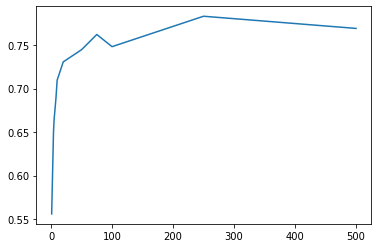

In [14]:
plt.plot(n_estimators_array, results)

In [15]:
# Number of features to consider at every split
max_features = ['sqrt', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['sqrt', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [16]:
rf = RandomForestClassifier(n_estimators=250, random_state=42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)

In [17]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_estimators=250,
                                                    random_state=42),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['sqrt', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

In [18]:
rf_random.best_params_

{'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}

### Random Forest with Best Parameters

In [19]:
forest = RandomForestClassifier(n_estimators=250, min_samples_leaf=2, max_features="sqrt", max_depth=10, random_state=42)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=250,
                       random_state=42)

In [20]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[62  1  1  4  0]
 [ 1 40  7  4  1]
 [ 0  1 37  2  9]
 [ 4  2  4 33 12]
 [ 0  0  6  5 50]]
              precision    recall  f1-score   support

       Chill       0.93      0.91      0.92        68
  Confidence       0.91      0.75      0.82        53
       Happy       0.67      0.76      0.71        49
     Romance       0.69      0.60      0.64        55
         Sad       0.69      0.82      0.75        61

    accuracy                           0.78       286
   macro avg       0.78      0.77      0.77       286
weighted avg       0.78      0.78      0.78       286



#### So this model is ever so slightly better. The weighted average went up to 78%, a one percent increase. Not much better, but still better. Let's look at the other dataset with outliers removed to see if it will be better.

## Second Random Forest with All Outliers Removed
### Creating X and Y Variables

In [21]:
x = mood_no_out.drop('Mood', axis=1)
y = mood_no_out['Mood']

### Splitting into test and train

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

### Random Forest Analysis

In [23]:
forest = RandomForestClassifier(n_estimators=500, random_state=42)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [24]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[ 6  0  0  4  0]
 [ 1  3  3  5  1]
 [ 0  1 38  2  7]
 [ 0  1  4 18 10]
 [ 0  0  7  4 39]]
              precision    recall  f1-score   support

       Chill       0.86      0.60      0.71        10
  Confidence       0.60      0.23      0.33        13
       Happy       0.73      0.79      0.76        48
     Romance       0.55      0.55      0.55        33
         Sad       0.68      0.78      0.73        50

    accuracy                           0.68       154
   macro avg       0.68      0.59      0.61       154
weighted avg       0.67      0.68      0.66       154



#### Oh ouch, approximately 10% less than the previous model. Considering that this model has almost half the data of the whole dataset, it isn't really that surpising. 

### Hyperparameter Tuning

In [25]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=42)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result)
    print(n, ':', result)

1 : 0.512987012987013
4 : 0.551948051948052
5 : 0.5909090909090909
8 : 0.6103896103896104
10 : 0.6233766233766234
20 : 0.6623376623376623
50 : 0.6558441558441559
75 : 0.6558441558441559
100 : 0.6623376623376623
250 : 0.6623376623376623
500 : 0.6753246753246753


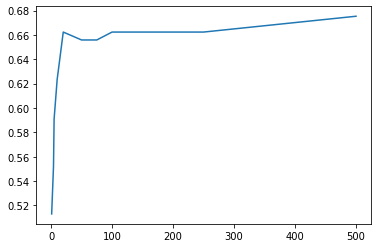

In [26]:
plt.plot(n_estimators_array, results)

In [27]:
# Number of features to consider at every split
max_features = ['sqrt', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['sqrt', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [28]:
rf = RandomForestClassifier(n_estimators=500,random_state=42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)

In [31]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_estimators=500,
                                                    random_state=42),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['sqrt', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

In [32]:
rf_random.best_params_

{'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}

### Random Forest with Best Parameters

In [29]:
forest = RandomForestClassifier(n_estimators=500, min_samples_leaf=1, max_features="sqrt", max_depth=20, random_state=42)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=500, random_state=42)

In [30]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[ 6  0  0  4  0]
 [ 1  3  3  5  1]
 [ 0  1 38  2  7]
 [ 0  1  4 18 10]
 [ 0  0  7  4 39]]
              precision    recall  f1-score   support

       Chill       0.86      0.60      0.71        10
  Confidence       0.60      0.23      0.33        13
       Happy       0.73      0.79      0.76        48
     Romance       0.55      0.55      0.55        33
         Sad       0.68      0.78      0.73        50

    accuracy                           0.68       154
   macro avg       0.68      0.59      0.61       154
weighted avg       0.67      0.68      0.66       154



#### Stayed exactly the same. I think this data is probably not the one to use. Although, I do wonder how much of this models inaccuracy has to do with the way the data got split, specifically with the confidence songs. The numbers for confidence in this model was a lot lower than with the others. We shall try with the last dataset with only the extreme outliers removed! 

## Creating Third Random Forest with Extreme Outliers Removed
### Creating X and Y Variables

In [31]:
x = mood_no_ex.drop('Mood', axis=1)
y = mood_no_ex['Mood']

### Splitting Data into Train and Test

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

### Random Forest Analysis

In [33]:
forest = RandomForestClassifier(n_estimators=500, random_state=42)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [34]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[61  1  0  8  1]
 [ 2 33  9  7  0]
 [ 1  1 38  0  9]
 [11  2  6 25 13]
 [ 1  0  8  2 43]]
              precision    recall  f1-score   support

       Chill       0.80      0.86      0.83        71
  Confidence       0.89      0.65      0.75        51
       Happy       0.62      0.78      0.69        49
     Romance       0.60      0.44      0.51        57
         Sad       0.65      0.80      0.72        54

    accuracy                           0.71       282
   macro avg       0.71      0.70      0.70       282
weighted avg       0.72      0.71      0.70       282



#### Better than with all the outlier removed, but still not as good as just the whole dataset. At least this model clears 70% accuracy. Let's see where we're at with some hyperparameter tuning. 

### Hyperparameter Tuning

In [35]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=42)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result)
    print(n, ':', result)

1 : 0.5460992907801419
4 : 0.6453900709219859
5 : 0.648936170212766
8 : 0.6914893617021277
10 : 0.6808510638297872
20 : 0.7056737588652482
50 : 0.7340425531914894
75 : 0.7056737588652482
100 : 0.7056737588652482
250 : 0.7056737588652482
500 : 0.7092198581560284


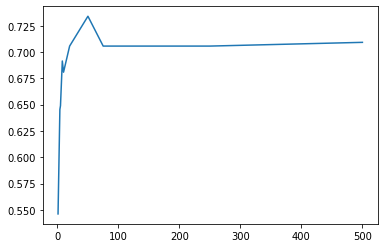

In [36]:
plt.plot(n_estimators_array, results)

In [37]:
# Number of features to consider at every split
max_features = ['sqrt', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['sqrt', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [38]:
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3)

In [39]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_estimators=50,
                                                    random_state=42),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['sqrt', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]})

In [40]:
rf_random.best_params_

{'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}

### Random Forest with Best Parameters

In [41]:
forest = RandomForestClassifier(n_estimators=50, min_samples_leaf=4, max_features="sqrt", max_depth=10, random_state=42)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=50,
                       random_state=42)

In [42]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[60  1  2  7  1]
 [ 2 34  8  7  0]
 [ 1  1 38  0  9]
 [11  2  6 27 11]
 [ 1  0  6  2 45]]
              precision    recall  f1-score   support

       Chill       0.80      0.85      0.82        71
  Confidence       0.89      0.67      0.76        51
       Happy       0.63      0.78      0.70        49
     Romance       0.63      0.47      0.54        57
         Sad       0.68      0.83      0.75        54

    accuracy                           0.72       282
   macro avg       0.73      0.72      0.71       282
weighted avg       0.73      0.72      0.72       282



#### The model got up to a 73% accuracy for precision and a 72% accuracy for recall. Still not better than the model with all of the dataset. 

### The best model overall was a random forest with hyperparameter tuning on the original dataset. The random forest's models were much better overall compared to the KNN models. Romance was the hardest for the models to predict, especially with recall. Chill and Confidence were the easiest to predict correctly with precision, but confidence had a harder time with recall. I would guess that Chill and Confidence had more defining features that set them apart from the other categories more easily. One of the really interesting parts of running these models was seeing how much would change with the randomization. I wrote and ran the code, then I restarted the kernel and reran everything to make sure it runs smoothly with no errors. It was interesting to see how much the models changed based on the randomization. Which then led me to putting random states on everything so it would stay consistent. 

### So, it's a bit disappointing with all the different datasets and hypertuning, I wasn't even able to get to 80% accuracy (which is my goal). I'm going to play around with feature selection techniques and see if there are any that look helpful. 

## Using Feature Selection Techniques to Improve Model
### Removing Features with Low Variance
#### I found this in an article about feature selection and thought I would give it a try to see if it helps at all.

In [43]:
from sklearn.feature_selection import VarianceThreshold
variance = VarianceThreshold(threshold = (.9 * (1 - .9)))
variance.fit(x) 
variance.get_support()

array([ True,  True, False, False,  True,  True,  True, False,  True,
       False, False, False,  True,  True])

In [44]:
mood_low = mood_cleaned.drop(['Danceability', 'Energy', 'Speechiness', 'Instrumentalness', 'Liveness', 'Valence'], axis=1)
mood_low

,Duration_ms,Popularity,Key,Loudness,Mode,Acousticness,Tempo,Mood,ExplicitR
0,148485,97,0,-5.927,1,0.082600,139.994,Happy,0
1,167303,96,6,-5.338,0,0.342000,173.930,Happy,0
2,154486,93,2,-4.898,1,0.619000,101.058,Happy,0
3,179551,93,0,-8.198,1,0.107000,170.010,Happy,0
4,163025,93,10,-5.110,1,0.352000,131.443,Happy,0
...,...,...,...,...,...,...,...,...,...
946,155821,48,2,-3.313,1,0.000039,150.050,Confidence,0
947,106740,48,6,-3.333,0,0.004390,154.958,Confidence,1
948,269666,49,5,-4.702,1,0.000063,135.055,Confidence,1
949,247545,41,1,-5.433,1,0.075800,149.916,Confidence,1


### Creating a Model with Low Variance Features removed

In [45]:
x = mood_low.drop('Mood', axis=1)
y = mood_low['Mood']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [47]:
forest = RandomForestClassifier(n_estimators=500, random_state=42)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [48]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[58  0  2  7  1]
 [ 1 38  8  6  0]
 [ 1  6 36  0  6]
 [ 8  5  5 23 14]
 [ 0  2 13  5 41]]
              precision    recall  f1-score   support

       Chill       0.85      0.85      0.85        68
  Confidence       0.75      0.72      0.73        53
       Happy       0.56      0.73      0.64        49
     Romance       0.56      0.42      0.48        55
         Sad       0.66      0.67      0.67        61

    accuracy                           0.69       286
   macro avg       0.68      0.68      0.67       286
weighted avg       0.69      0.69      0.68       286



### Soooo, that made it worse. As I have yet to see hyperparameter tuning increase the accuracy more than a few percentage points, I don't think it's worth going through it. 

## Another Feature Selection Technique I found.

### Creating X and Y Variables

In [49]:
x = mood_cleaned.drop('Mood', axis=1)
y = mood_cleaned['Mood']

### Spilting into train and test

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

### Selecting Features

In [51]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 500))
sel.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500))

In [52]:
sel.get_support()

array([False,  True,  True,  True, False, False, False,  True,  True,
        True, False,  True, False, False])

In [53]:
selected_feat= x_train.columns[(sel.get_support())]
print(selected_feat)

Index(['Popularity', 'Danceability', 'Energy', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Valence'],
      dtype='object')


### Dropping Features that were not selected

In [55]:
mood_sel = mood_cleaned.drop(['Duration_ms', "Key", "Mode", 'Loudness', 'Liveness', 'Tempo', 'ExplicitR'], axis=1)
mood_sel

,Popularity,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence,Mood
0,97,0.704,0.797,0.0475,0.082600,0.000745,0.825,Happy
1,96,0.520,0.731,0.0557,0.342000,0.001010,0.662,Happy
2,93,0.881,0.592,0.0324,0.619000,0.000013,0.719,Happy
3,93,0.565,0.636,0.0638,0.107000,0.000010,0.525,Happy
4,93,0.768,0.714,0.0401,0.352000,0.000000,0.842,Happy
...,...,...,...,...,...,...,...,...
946,48,0.639,0.950,0.0609,0.000039,0.494000,0.898,Confidence
947,48,0.573,0.723,0.0571,0.004390,0.335000,0.931,Confidence
948,49,0.469,0.882,0.0680,0.000063,0.004830,0.298,Confidence
949,41,0.469,0.885,0.0577,0.075800,0.035200,0.330,Confidence


### Running Model

In [56]:
x = mood_sel.drop('Mood', axis=1)
y = mood_sel['Mood']

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [58]:
forest = RandomForestClassifier(n_estimators=500, random_state=42)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [59]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[60  2  1  4  1]
 [ 2 38 10  3  0]
 [ 0  1 37  4  7]
 [ 2  3  4 35 11]
 [ 0  1  8  9 43]]
              precision    recall  f1-score   support

       Chill       0.94      0.88      0.91        68
  Confidence       0.84      0.72      0.78        53
       Happy       0.62      0.76      0.68        49
     Romance       0.64      0.64      0.64        55
         Sad       0.69      0.70      0.70        61

    accuracy                           0.74       286
   macro avg       0.75      0.74      0.74       286
weighted avg       0.76      0.74      0.75       286



#### A 74% accuracy is on the higher side of what we have been seeing. But when we compare it to the original model with the same dataset without feature selection, we see that it's every so slightly worse. But, we'll see where it lands with some hyperparameter tuning.

### Hyperparameter Tuning

In [60]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=42)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result)
    print(n, ':', result)

1 : 0.5769230769230769
4 : 0.6468531468531469
5 : 0.6328671328671329
8 : 0.6538461538461539
10 : 0.6958041958041958
20 : 0.7412587412587412
50 : 0.7517482517482518
75 : 0.7552447552447552
100 : 0.7412587412587412
250 : 0.7552447552447552
500 : 0.7447552447552448


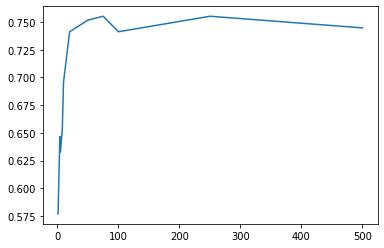

In [61]:
plt.plot(n_estimators_array, results)

In [62]:
rf = RandomForestClassifier(n_estimators=75, random_state=42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3)

In [63]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_estimators=75,
                                                    random_state=42),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['sqrt', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]})

In [64]:
rf_random.best_params_

{'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}

In [65]:
forest = RandomForestClassifier(n_estimators=75, min_samples_leaf=2, max_features='sqrt', max_depth=10, random_state=42)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=75,
                       random_state=42)

In [66]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[58  3  1  3  3]
 [ 1 38  8  5  1]
 [ 0  1 39  2  7]
 [ 5  4  4 33  9]
 [ 0  1  7  6 47]]
              precision    recall  f1-score   support

       Chill       0.91      0.85      0.88        68
  Confidence       0.81      0.72      0.76        53
       Happy       0.66      0.80      0.72        49
     Romance       0.67      0.60      0.63        55
         Sad       0.70      0.77      0.73        61

    accuracy                           0.75       286
   macro avg       0.75      0.75      0.75       286
weighted avg       0.76      0.75      0.75       286



#### Hyperparameter tuning brought it up one percent to 75%. Still not as good as the models with all the data and all the features.

 
## So now, I've decided to remove the mood category romance. This is due to it having the lowest scores.

### Remove Romance Genre

In [90]:
no_love = mood_cleaned.loc[mood_cleaned['Mood'] != "Romance"]
no_love

,Duration_ms,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Mood,ExplicitR
0,148485,97,0.704,0.797,0,-5.927,1,0.0475,0.082600,0.000745,0.0546,0.825,139.994,Happy,0
1,167303,96,0.520,0.731,6,-5.338,0,0.0557,0.342000,0.001010,0.3110,0.662,173.930,Happy,0
2,154486,93,0.881,0.592,2,-4.898,1,0.0324,0.619000,0.000013,0.0901,0.719,101.058,Happy,0
3,179551,93,0.565,0.636,0,-8.198,1,0.0638,0.107000,0.000010,0.4470,0.525,170.010,Happy,0
4,163025,93,0.768,0.714,10,-5.110,1,0.0401,0.352000,0.000000,0.1500,0.842,131.443,Happy,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,155821,48,0.639,0.950,2,-3.313,1,0.0609,0.000039,0.494000,0.0605,0.898,150.050,Confidence,0
947,106740,48,0.573,0.723,6,-3.333,0,0.0571,0.004390,0.335000,0.4080,0.931,154.958,Confidence,1
948,269666,49,0.469,0.882,5,-4.702,1,0.0680,0.000063,0.004830,0.3180,0.298,135.055,Confidence,1
949,247545,41,0.469,0.885,1,-5.433,1,0.0577,0.075800,0.035200,0.3460,0.330,149.916,Confidence,1


### Create X and Y Variables

In [103]:
x = no_love.drop('Mood', axis=1)
y = no_love['Mood']

### Split into train and test

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

### Create Model

In [93]:
forest = RandomForestClassifier(n_estimators=500, random_state=42)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [94]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[56  0  0  4]
 [ 1 39  6  1]
 [ 0  3 46 14]
 [ 0  1  7 48]]
              precision    recall  f1-score   support

       Chill       0.98      0.93      0.96        60
  Confidence       0.91      0.83      0.87        47
       Happy       0.78      0.73      0.75        63
         Sad       0.72      0.86      0.78        56

    accuracy                           0.84       226
   macro avg       0.85      0.84      0.84       226
weighted avg       0.84      0.84      0.84       226



#### Eh!!! We finally got it over 80 percent. Yay! Let's see if we can get even better with hyperparameter tuning.
### Hyperparameter Tuning

In [95]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=42)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result)
    print(n, ':', result)

1 : 0.6946902654867256
4 : 0.7964601769911505
5 : 0.7699115044247787
8 : 0.7920353982300885
10 : 0.7876106194690266
20 : 0.8097345132743363
50 : 0.831858407079646
75 : 0.8230088495575221
100 : 0.831858407079646
250 : 0.831858407079646
500 : 0.8362831858407079


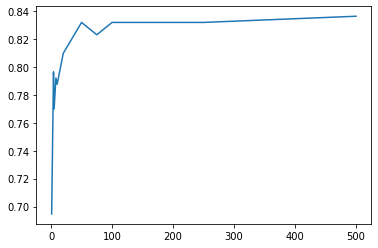

In [96]:
plt.plot(n_estimators_array, results)

In [97]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3)

In [98]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_estimators=500,
                                                    random_state=42),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['sqrt', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]})

In [99]:
rf_random.best_params_

{'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}

### Model with Best Params

In [100]:
forest = RandomForestClassifier(n_estimators=500, min_samples_leaf=2, max_features='sqrt', max_depth=20, random_state=42)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=500,
                       random_state=42)

In [101]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[54  0  1  5]
 [ 1 39  6  1]
 [ 0  4 46 13]
 [ 0  1  8 47]]
              precision    recall  f1-score   support

       Chill       0.98      0.90      0.94        60
  Confidence       0.89      0.83      0.86        47
       Happy       0.75      0.73      0.74        63
         Sad       0.71      0.84      0.77        56

    accuracy                           0.82       226
   macro avg       0.83      0.82      0.83       226
weighted avg       0.83      0.82      0.83       226



#### And it's actually worse. I don't know why, but it is. So, this brings us to the best model so far being first model with no romance catergory. 

## So, I thought now I would go back to feature selection. I wanted to take a look at the importance of each variable on the model. Then work backwards removing one at a time. 

### Looking at Feature Importances

Popularity          0.168136
Instrumentalness    0.150878
Valence             0.115166
Acousticness        0.092479
Energy              0.090433
Danceability        0.073687
Speechiness         0.072913
Loudness            0.055955
ExplicitR           0.045901
Tempo               0.042514
Duration_ms         0.038528
Liveness            0.029527
Key                 0.016908
Mode                0.006977
dtype: float64


<AxesSubplot:>

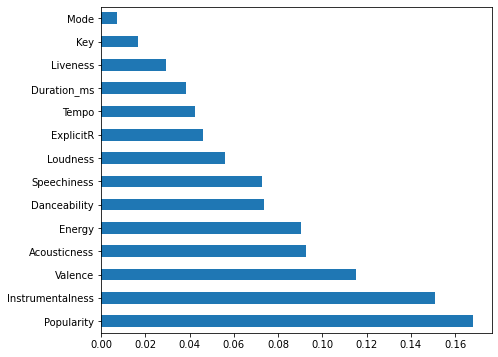

In [105]:
forest = RandomForestClassifier(n_estimators=500, random_state=42)
forest.fit(x_train, y_train)

feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

feature_importances.plot(kind='barh', figsize=(7,6))

### Removing Mode

In [107]:
no_mode = no_love.drop('Mode', axis=1)
no_mode

,Duration_ms,Popularity,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Mood,ExplicitR
0,148485,97,0.704,0.797,0,-5.927,0.0475,0.082600,0.000745,0.0546,0.825,139.994,Happy,0
1,167303,96,0.520,0.731,6,-5.338,0.0557,0.342000,0.001010,0.3110,0.662,173.930,Happy,0
2,154486,93,0.881,0.592,2,-4.898,0.0324,0.619000,0.000013,0.0901,0.719,101.058,Happy,0
3,179551,93,0.565,0.636,0,-8.198,0.0638,0.107000,0.000010,0.4470,0.525,170.010,Happy,0
4,163025,93,0.768,0.714,10,-5.110,0.0401,0.352000,0.000000,0.1500,0.842,131.443,Happy,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,155821,48,0.639,0.950,2,-3.313,0.0609,0.000039,0.494000,0.0605,0.898,150.050,Confidence,0
947,106740,48,0.573,0.723,6,-3.333,0.0571,0.004390,0.335000,0.4080,0.931,154.958,Confidence,1
948,269666,49,0.469,0.882,5,-4.702,0.0680,0.000063,0.004830,0.3180,0.298,135.055,Confidence,1
949,247545,41,0.469,0.885,1,-5.433,0.0577,0.075800,0.035200,0.3460,0.330,149.916,Confidence,1


### Run Model

In [108]:
x = no_mode.drop('Mood', axis=1)
y = no_mode['Mood']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

### Random Forest Analysis

forest = RandomForestClassifier(n_estimators=500, random_state=42)
forest.fit(x_train, y_train)

forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[55  0  0  5]
 [ 1 39  6  1]
 [ 0  3 46 14]
 [ 0  2  8 46]]
              precision    recall  f1-score   support

       Chill       0.98      0.92      0.95        60
  Confidence       0.89      0.83      0.86        47
       Happy       0.77      0.73      0.75        63
         Sad       0.70      0.82      0.75        56

    accuracy                           0.82       226
   macro avg       0.83      0.82      0.83       226
weighted avg       0.83      0.82      0.83       226



#### Without tuning the hyperparameters, this model gives us an average accuracy of 83% for precision and 82% for recall. Better than a lot of the models, but not as good at first model with the romance mood removed. We shall try with hyperparameter tuning.  

### Hyperparameter Tuning

1 : 0.7123893805309734
4 : 0.7566371681415929
5 : 0.7610619469026548
8 : 0.7743362831858407
10 : 0.7743362831858407
20 : 0.8053097345132744
50 : 0.831858407079646
75 : 0.8230088495575221
100 : 0.8230088495575221
250 : 0.831858407079646
500 : 0.8230088495575221


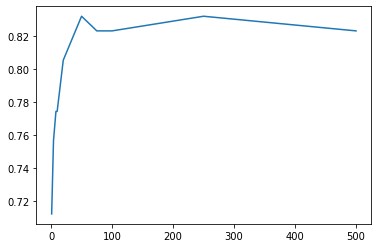

In [109]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=42)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result)
    print(n, ':', result)

plt.plot(n_estimators_array, results)

In [110]:
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)

rf_random.fit(x_train, y_train)

rf_random.best_params_

{'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}

In [111]:
forest = RandomForestClassifier(n_estimators=50, min_samples_leaf=1, max_features="sqrt", max_depth=20, random_state=42)
forest.fit(x_train, y_train)

forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[54  1  1  4]
 [ 2 39  6  0]
 [ 1  3 47 12]
 [ 0  1  7 48]]
              precision    recall  f1-score   support

       Chill       0.95      0.90      0.92        60
  Confidence       0.89      0.83      0.86        47
       Happy       0.77      0.75      0.76        63
         Sad       0.75      0.86      0.80        56

    accuracy                           0.83       226
   macro avg       0.84      0.83      0.83       226
weighted avg       0.84      0.83      0.83       226



#### At least the average accuracy's did go up in this model with hyperparameter tuning. But it still didn't beat the original no romance model. 

## I'm gonna remove one more feature just to see if it lowers the accuracy again. 
### Removing Key

In [113]:
no_key = no_mode.drop('Key', axis=1)
no_key

,Duration_ms,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Mood,ExplicitR
0,148485,97,0.704,0.797,-5.927,0.0475,0.082600,0.000745,0.0546,0.825,139.994,Happy,0
1,167303,96,0.520,0.731,-5.338,0.0557,0.342000,0.001010,0.3110,0.662,173.930,Happy,0
2,154486,93,0.881,0.592,-4.898,0.0324,0.619000,0.000013,0.0901,0.719,101.058,Happy,0
3,179551,93,0.565,0.636,-8.198,0.0638,0.107000,0.000010,0.4470,0.525,170.010,Happy,0
4,163025,93,0.768,0.714,-5.110,0.0401,0.352000,0.000000,0.1500,0.842,131.443,Happy,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,155821,48,0.639,0.950,-3.313,0.0609,0.000039,0.494000,0.0605,0.898,150.050,Confidence,0
947,106740,48,0.573,0.723,-3.333,0.0571,0.004390,0.335000,0.4080,0.931,154.958,Confidence,1
948,269666,49,0.469,0.882,-4.702,0.0680,0.000063,0.004830,0.3180,0.298,135.055,Confidence,1
949,247545,41,0.469,0.885,-5.433,0.0577,0.075800,0.035200,0.3460,0.330,149.916,Confidence,1


### Run Model

In [114]:
x = no_key.drop('Mood', axis=1)
y = no_key['Mood']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

### Random Forest Analysis

forest = RandomForestClassifier(n_estimators=500, random_state=42)
forest.fit(x_train, y_train)

forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[55  0  0  5]
 [ 1 39  6  1]
 [ 0  3 46 14]
 [ 0  2  8 46]]
              precision    recall  f1-score   support

       Chill       0.98      0.92      0.95        60
  Confidence       0.89      0.83      0.86        47
       Happy       0.77      0.73      0.75        63
         Sad       0.70      0.82      0.75        56

    accuracy                           0.82       226
   macro avg       0.83      0.82      0.83       226
weighted avg       0.83      0.82      0.83       226



#### Removing the key feature did not change the accuracy average from the previous model. 

### Hyperparameter Tuning

1 : 0.6371681415929203
4 : 0.7654867256637168
5 : 0.7654867256637168
8 : 0.7920353982300885
10 : 0.8008849557522124
20 : 0.8053097345132744
50 : 0.831858407079646
75 : 0.8097345132743363
100 : 0.8185840707964602
250 : 0.8185840707964602
500 : 0.8230088495575221


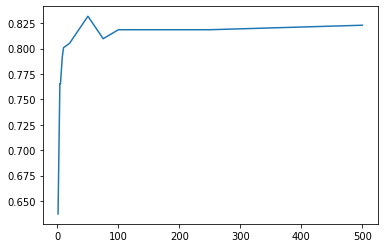

In [115]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=42)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result)
    print(n, ':', result)

plt.plot(n_estimators_array, results)

In [116]:
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)

rf_random.fit(x_train, y_train)

rf_random.best_params_

{'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}

In [117]:
forest = RandomForestClassifier(n_estimators=50, min_samples_leaf=4, max_features="sqrt", max_depth=20, random_state=42)
forest.fit(x_train, y_train)

forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[55  0  1  4]
 [ 4 37  6  0]
 [ 0  3 45 15]
 [ 0  1  6 49]]
              precision    recall  f1-score   support

       Chill       0.93      0.92      0.92        60
  Confidence       0.90      0.79      0.84        47
       Happy       0.78      0.71      0.74        63
         Sad       0.72      0.88      0.79        56

    accuracy                           0.82       226
   macro avg       0.83      0.82      0.82       226
weighted avg       0.83      0.82      0.82       226



#### No changes. 

## Removing just one more feature. 
### Removing Liveness

In [118]:
no_live = no_key.drop('Liveness', axis=1)
no_live

,Duration_ms,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Tempo,Mood,ExplicitR
0,148485,97,0.704,0.797,-5.927,0.0475,0.082600,0.000745,0.825,139.994,Happy,0
1,167303,96,0.520,0.731,-5.338,0.0557,0.342000,0.001010,0.662,173.930,Happy,0
2,154486,93,0.881,0.592,-4.898,0.0324,0.619000,0.000013,0.719,101.058,Happy,0
3,179551,93,0.565,0.636,-8.198,0.0638,0.107000,0.000010,0.525,170.010,Happy,0
4,163025,93,0.768,0.714,-5.110,0.0401,0.352000,0.000000,0.842,131.443,Happy,0
...,...,...,...,...,...,...,...,...,...,...,...,...
946,155821,48,0.639,0.950,-3.313,0.0609,0.000039,0.494000,0.898,150.050,Confidence,0
947,106740,48,0.573,0.723,-3.333,0.0571,0.004390,0.335000,0.931,154.958,Confidence,1
948,269666,49,0.469,0.882,-4.702,0.0680,0.000063,0.004830,0.298,135.055,Confidence,1
949,247545,41,0.469,0.885,-5.433,0.0577,0.075800,0.035200,0.330,149.916,Confidence,1


### Run Model

In [119]:
x = no_live.drop('Mood', axis=1)
y = no_live['Mood']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

### Random Forest Analysis

forest = RandomForestClassifier(n_estimators=500, random_state=42)
forest.fit(x_train, y_train)

forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[54  1  0  5]
 [ 1 39  6  1]
 [ 0  2 47 14]
 [ 0  1  8 47]]
              precision    recall  f1-score   support

       Chill       0.98      0.90      0.94        60
  Confidence       0.91      0.83      0.87        47
       Happy       0.77      0.75      0.76        63
         Sad       0.70      0.84      0.76        56

    accuracy                           0.83       226
   macro avg       0.84      0.83      0.83       226
weighted avg       0.84      0.83      0.83       226



#### Eh! This model is better! Still doesn't better the no romance og model, but perhaps we are getting somewhere. 

### Hyperparameter Tuning

1 : 0.7168141592920354
4 : 0.7522123893805309
5 : 0.7522123893805309
8 : 0.7610619469026548
10 : 0.7699115044247787
20 : 0.7876106194690266
50 : 0.8141592920353983
75 : 0.8230088495575221
100 : 0.8230088495575221
250 : 0.8230088495575221
500 : 0.827433628318584


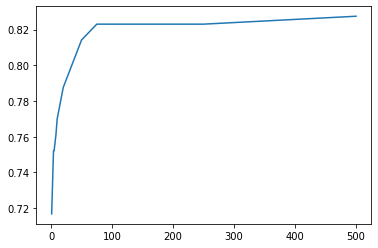

In [120]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=42)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result)
    print(n, ':', result)

plt.plot(n_estimators_array, results)

In [121]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)

rf_random.fit(x_train, y_train)

rf_random.best_params_

{'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}

In [122]:
forest = RandomForestClassifier(n_estimators=500, min_samples_leaf=1, max_features="sqrt", max_depth=20, random_state=42)
forest.fit(x_train, y_train)

forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[54  1  0  5]
 [ 1 39  6  1]
 [ 0  2 47 14]
 [ 0  1  8 47]]
              precision    recall  f1-score   support

       Chill       0.98      0.90      0.94        60
  Confidence       0.91      0.83      0.87        47
       Happy       0.77      0.75      0.76        63
         Sad       0.70      0.84      0.76        56

    accuracy                           0.83       226
   macro avg       0.84      0.83      0.83       226
weighted avg       0.84      0.83      0.83       226



#### Stayed the same as with no hyperparameter tuning. 

## Removing one more feature.
### Removing Duration

In [123]:
no_dur = no_live.drop('Duration_ms', axis=1)
no_dur

,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Tempo,Mood,ExplicitR
0,97,0.704,0.797,-5.927,0.0475,0.082600,0.000745,0.825,139.994,Happy,0
1,96,0.520,0.731,-5.338,0.0557,0.342000,0.001010,0.662,173.930,Happy,0
2,93,0.881,0.592,-4.898,0.0324,0.619000,0.000013,0.719,101.058,Happy,0
3,93,0.565,0.636,-8.198,0.0638,0.107000,0.000010,0.525,170.010,Happy,0
4,93,0.768,0.714,-5.110,0.0401,0.352000,0.000000,0.842,131.443,Happy,0
...,...,...,...,...,...,...,...,...,...,...,...
946,48,0.639,0.950,-3.313,0.0609,0.000039,0.494000,0.898,150.050,Confidence,0
947,48,0.573,0.723,-3.333,0.0571,0.004390,0.335000,0.931,154.958,Confidence,1
948,49,0.469,0.882,-4.702,0.0680,0.000063,0.004830,0.298,135.055,Confidence,1
949,41,0.469,0.885,-5.433,0.0577,0.075800,0.035200,0.330,149.916,Confidence,1


### Create Model

In [124]:
x = no_dur.drop('Mood', axis=1)
y = no_dur['Mood']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

### Random Forest Analysis

forest = RandomForestClassifier(n_estimators=500, random_state=42)
forest.fit(x_train, y_train)

forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[54  1  0  5]
 [ 1 39  6  1]
 [ 0  4 45 14]
 [ 0  1  8 47]]
              precision    recall  f1-score   support

       Chill       0.98      0.90      0.94        60
  Confidence       0.87      0.83      0.85        47
       Happy       0.76      0.71      0.74        63
         Sad       0.70      0.84      0.76        56

    accuracy                           0.82       226
   macro avg       0.83      0.82      0.82       226
weighted avg       0.83      0.82      0.82       226



#### Arg, and it's worse. I guess we found the point where we should remove no more features.

### Hyperparameter Tuning just for the fun of it

1 : 0.7168141592920354
4 : 0.7610619469026548
5 : 0.7876106194690266
8 : 0.8053097345132744
10 : 0.8185840707964602
20 : 0.8008849557522124
50 : 0.8097345132743363
75 : 0.827433628318584
100 : 0.8185840707964602
250 : 0.8185840707964602
500 : 0.8185840707964602


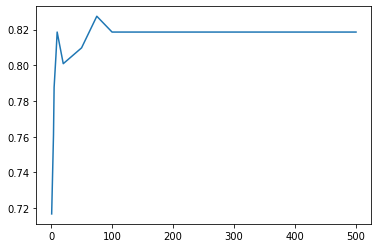

In [125]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=42)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result)
    print(n, ':', result)

plt.plot(n_estimators_array, results)

In [126]:
rf = RandomForestClassifier(n_estimators=75, random_state=42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)

rf_random.fit(x_train, y_train)

rf_random.best_params_

{'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}

In [127]:
forest = RandomForestClassifier(n_estimators=75, min_samples_leaf=1, max_features="sqrt", max_depth=10, random_state=42)
forest.fit(x_train, y_train)

forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[54  2  0  4]
 [ 1 39  6  1]
 [ 0  4 45 14]
 [ 0  0 10 46]]
              precision    recall  f1-score   support

       Chill       0.98      0.90      0.94        60
  Confidence       0.87      0.83      0.85        47
       Happy       0.74      0.71      0.73        63
         Sad       0.71      0.82      0.76        56

    accuracy                           0.81       226
   macro avg       0.82      0.82      0.82       226
weighted avg       0.82      0.81      0.82       226



## After running so, so many models, it looks like the best model will be the original dataset with the romance genre removed. It still only got us to 84%. But when I ran the initial model and I saw the averages in the 70s, my goal was to get it at least into the 80th percentile. And I did that! In the end, it depends on how important that fifth mood category is. I personally think that having an extra category is worth the lower accuracy score. 